Discretization is an essential preprocessing method used in many data science processes.

Its main goal is to transform a set of continuous attributes into discrete ones, by associating categorical values to intervals and thus transforming quantitative data into qualitative data.

Many existing data science algorithms are designed only to learn in categorical data, using nominal attributes, while real-world applications usually involve continuous features.

1. Use the KBinsDiscretizer class to transform the provided data into discretized attributes with 3 bins per attribute

2. Use the same discretizer to transform into a different number of bins per attribute: att1=3 bins, att2=2 bins, 

3. Print the results of your transformation process



In [9]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

x = np.array([[ -3, 5, 15 ],
               [  0, 6, 14 ],
               [  6, 3, 11 ],
               [  1, 5, 14 ],
               [  7, 6, 17 ]])

#Use the KBinsDiscretizer class to transform the provided data into discretized attributes with 3 bins per attribute
est = KBinsDiscretizer(n_bins=3, encode='ordinal').fit(x)
x_tran=est.transform(x)
#Print the result
print("3 bins per attribute: \n",x_tran)

#Use the same discretizer to transform into a different number of bins per attribute: att1=3 bins, att2=2 bins, att3=3 bins 
est = KBinsDiscretizer(n_bins=[3, 2, 3], encode='ordinal').fit(x)
x_tran=est.transform(x)
#Print the result
print("\nDifferent number of bins per attribute: \n",x_tran)

3 bins per attribute: 
 [[0. 1. 2.]
 [0. 2. 1.]
 [2. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]

Different number of bins per attribute: 
 [[0. 1. 2.]
 [0. 1. 1.]
 [2. 0. 0.]
 [1. 1. 1.]
 [2. 1. 2.]]


With an additional paramerer, different discretization strategies can be implemented with KBinsDiscretizer:

- 'uniform': The discretization is uniform in each feature, which means that the bin widths are constant in each dimension (equal width binning)
- 'quantile': The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples (equal frequency binning)
- 'kmeans': The discretization is based on the centroids of a KMeans clustering procedure



Width bin  0 :  -1.4720472292153723

Width bin  1 :  -1.4720472292153723

Width bin  2 :  -1.4720472292153728

Width bin  3 :  -1.472047229215372


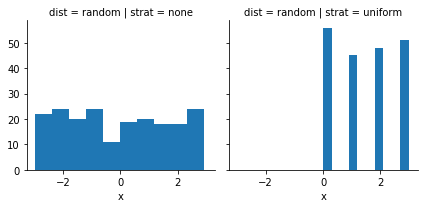

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num_samples = 200
num_bins=4
centers_0 = np.array([15,40])
centers_1 = np.array([25])

#distributions: x0=uniform,x1=double_hump
x0= np.random.RandomState(rm_state).uniform(-3, 3, size=num_samples) #Random, uniform data set
x1, _= make_blobs(n_samples=num_samples, centers=2, n_features=1, random_state=1) #Gaussian, double hump
#Set dist (and x) to one of the two distributions
dist ='random'
x=x0

#define discretization strategy
strat = 'uniform'
# 'quantile', 'kmeans']

#Initialize  a data frame with distribution x=x0 as raw data 
#Add an additional indicating the discretization strategy (in this case 'none' as it is raw data)
df = pd.DataFrame (x, columns = ['x'])
df['dist']=dist
df['strat']='none'

#df_bin_edges = pd.DataFrame (columns = ['dist','strat','bin1','bin2','bin3','bin4','bin5'])
#print("Bin edges:")

#Define discretizer with 4 bins and apply it using the defined strategy
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy=strat)
enc.fit(x.reshape(-1, 1))
x_tran=enc.transform(x.reshape(-1, 1))

#Build new data frame with discretized values (size=num_samples)
df_app = pd.DataFrame (x_tran, columns = ['x'])
df_app['dist']=dist
df_app['strat']=strat

#Append new data frame to data frame with distribution 0
df=df.append(df_app)

#Print bin width using bin_edges_ attribute of KBinsDiscretizer
for i in range (0,num_bins):
    print("\nWidth bin ",i,": ",enc.bin_edges_[0][i]-enc.bin_edges_[0][i+1])

#Visualize data in Seaborn histrogram grid using FacetGrid class
cmap = sns.cubehelix_palette(n_colors=10,as_cmap=True)
g = sns.FacetGrid(df, col="strat", row="dist")
g.map(plt.hist,"x")

Encapsulate the discretization steps of the last task into a function called "discretize", passing the raw data array, the distribution name and the discretization strategy as parameters

Call the function with different distributions (dist = 'uniform' or 'double_hump'; x=x1 or x2) and with different strategies (strat='uniform','quantile', 'kmeans')


Width bin  0 :  -1.2502750792219453

Width bin  1 :  -1.4826633267390845

Width bin  2 :  -1.6534788458414897

Width bin  3 :  -1.5017716650589699


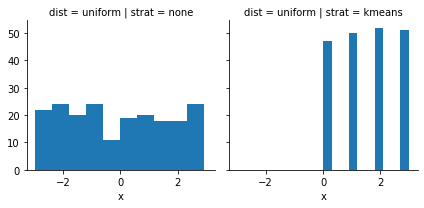

In [37]:
def discretize(x,dist,strat):
    #Initialize  a data frame with distribution x=x0 as raw data 
    #Add an additional indicating the discretization strategy (in this case 'none' as it is raw data)
    df = pd.DataFrame (x, columns = ['x'])
    df['dist']=dist
    df['strat']='none'

    #Define discretizer with 4 bins and apply it using the defined strategy
    enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy=strat)
    enc.fit(x.reshape(-1, 1))
    x_tran=enc.transform(x.reshape(-1, 1))

    #Build new data frame with discretized values (size=num_samples)
    df_app = pd.DataFrame (x_tran, columns = ['x'])
    df_app['dist']=dist
    df_app['strat']=strat

    #Append new data frame to data frame with distribution 0
    df=df.append(df_app)

    #Print bin width using bin_edges_ attribute of KBinsDiscretizer
    for i in range (0,num_bins):
        print("\nWidth bin ",i,": ",enc.bin_edges_[0][i]-enc.bin_edges_[0][i+1])

    #Visualize data in Seaborn histrogram grid using FacetGrid class
    cmap = sns.cubehelix_palette(n_colors=10,as_cmap=True)
    g = sns.FacetGrid(df, col="strat", row="dist")
    g.map(plt.hist,"x")

#Call the function with different distributions (dist = 'uniform' or 'double_hump'; x=x1 or x2)
#Call the function with different strategies (strat='uniform','quantile', 'kmeans')

discretize(x0,'uniform','kmeans')